In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

In [ ]:
app = FaceAnalysis(name = "buffalo_s", providers = ["CPUExecutionProvider"])
app.prepare(ctx_id = 0, det_size = (640, 640))


(-0.5, 1279.5, 719.5, -0.5)

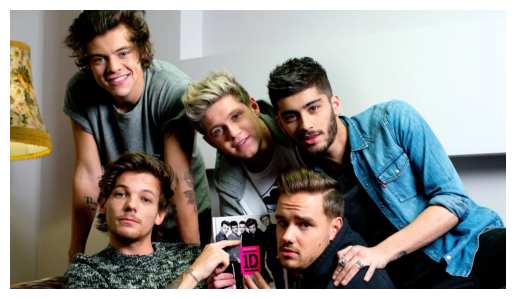

In [54]:
input_image = cv2.imread("input/one_direction.jpg")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
plt.axis("off")

In [ ]:
results = app.get(input_image)
results

In [56]:

face_bank = np.load("face_bank.npy", allow_pickle=True)

(-0.5, 1279.5, 719.5, -0.5)

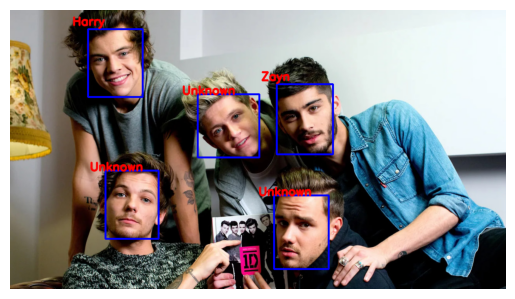

In [59]:
THRESHOLD = 25
result_image = input_image.copy()



for result in results:

    cv2.rectangle(input_image, (int(result.bbox[0]), 
                                int(result.bbox[1])), 
                                (int(result.bbox[2]), 
                                 int(result.bbox[3])),(0, 0, 255),4)    

    for person in face_bank:
        face_bank_person_embedding = person["embedding"]
        new_person_embedding = result["embedding"]

        distance = np.sqrt(np.sum((face_bank_person_embedding - new_person_embedding)**2))

        if distance < THRESHOLD:
            cv2.putText(result_image, person["name"],
            (int(result.bbox[0]) - 40, int(result.bbox[1] - 10)),
            cv2.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0),3, cv2.LINE_AA)

            break
    else:
        cv2.putText(result_image, "Unknown",
            (int(result.bbox[0]) - 40, int(result.bbox[1])),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3,cv2.LINE_AA)


plt.imshow(result_image)
plt.axis("off")